# Problem 6 - Batch Normalization, Dropout, MNIST

Batch normalization and Dropout are used as effective regularization techniques. However its not clear which one should be preferred and whether their benefits add up when used in conjunction. In this problem we will compare batch normalization, dropout, and their conjunction using MNIST and LeNet-5 (see e.g., http://yann.lecun.com/exdb/lenet/). LeNet-5 is one of the earliest convolutional neural network developed for image classification and its implementation in all major framework is available. You can refer to Lecture 3 slides for definition of standardization and batch normalization.


1. Explain the terms co-adaptation and internal covariance-shift. Use examples if needed. You may need to refer to two papers mentioned below to answer this question.


### Answer:

Co-adaptation means that the hidden units of a neural networks starts to assimilate similar features and their behavior becomes correlated. Dropout is a technique that helps the network avoid such pitfall. With dropout the hidden layers can have a certain amount of neurons turn off in an attempt to train them separatly over different epoch to ensure that neurons generalize over the features as much as possible. 

Now into internal covariance-shift. In a neural network, the output of the input layer feeds into the input of the next layer, and neural networks can get very large with upt to n layers. During this process,the parameters of the layers gets modified at each epoch and so does the distribution of the inputs to the subsequent layer changes because of the calculation on the previous layers. That is called internal covariance shift and it can be solved with the use of batch normalization. 

2. Batch normalization is traditionally used in hidden layers, for input layer standard normalization is used. In standard normalization the mean and standard deviation are calculated using the entire training dataset whereas in batch normalization these statistics are calculated for each mini-batch. Train LeNet-5 with standard normalization of input and batch normalization for hidden layers. What are the learned batch norm parameters for each layer ?

In [1]:
import numpy as np 
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import Normalization

from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = tf.pad(X_train, [[0, 0], [2,2], [2,2]])/255
X_test = tf.pad(X_test, [[0, 0], [2,2], [2,2]])/255

X_train = tf.expand_dims(X_train, axis=3, name=None)
X_test = tf.expand_dims(X_test, axis=3, name=None)

#testing
# adapt_data =X_train
# input_data = X_train
# layer = tf.keras.layers.Normalization(axis=None)
# layer.adapt(adapt_data)

# layer(input_data)

# print(X_train.shape)
model1 = Sequential()
# model.add(norm_layer)
model1.add(tf.keras.layers.Normalization(axis=None,input_shape=  X_train.shape[1:]))
model1.add(Conv2D(6, 5, activation='tanh',input_shape=  X_train.shape[1:] ))

model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.AveragePooling2D(2))
model1.add(Conv2D(16, 5, padding='valid', activation='tanh'))

model1.add(tf.keras.layers.BatchNormalization())

model1.add(tf.keras.layers.AveragePooling2D(2))
model1.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))


model1.add(Flatten())
model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(84, activation='tanh'))

model1.add(tf.keras.layers.BatchNormalization())
model1.add(Dense(10, activation='softmax'))

In [2]:
model1.build()
model1.summary()
model1.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history1 = model1.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 32, 32, 1)        3         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 6)        24        
 ormalization)                                                   
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                        

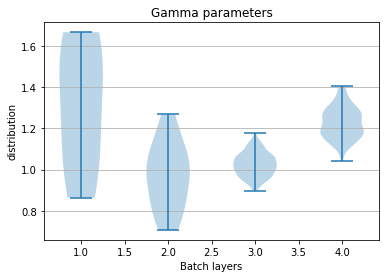

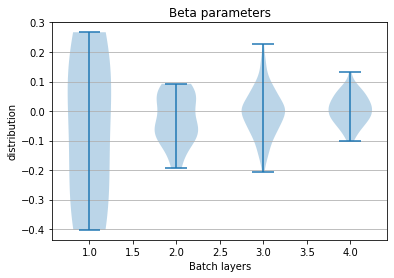

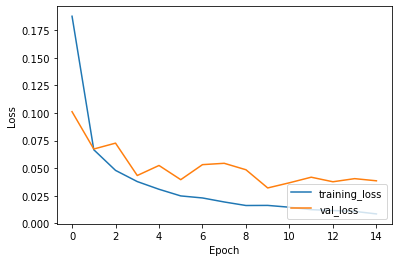

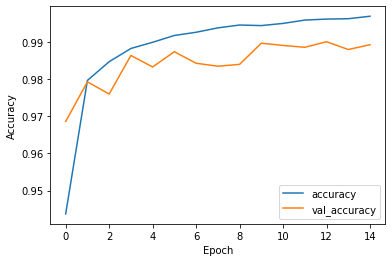

313/313 - 1s - loss: 0.0386 - accuracy: 0.9893 - 1s/epoch - 5ms/step


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots()

axes.violinplot(dataset = [model1.layers[2].gamma,
                           model1.layers[5].gamma,
                           model1.layers[9].gamma,
                           model1.layers[11].gamma,
                           ])

axes.set_title('Gamma parameters')
axes.yaxis.grid(True)
axes.set_xlabel('Batch layers')
axes.set_ylabel('distribution')

plt.show()
fig, axes = plt.subplots()

axes.violinplot(dataset = [model1.layers[2].beta,
                           model1.layers[5].beta,
                           model1.layers[9].beta,
                           model1.layers[11].beta,
                           ] )

axes.set_title('Beta parameters')
axes.yaxis.grid(True)
axes.set_xlabel('Batch layers')
axes.set_ylabel('distribution')

plt.show()
# you need to plot the violin plots.

plt.plot(model_history1.history['loss'], label='training_loss')
plt.plot(model_history1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()

plt.plot(model_history1.history['accuracy'], label='accuracy')
plt.plot(model_history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model1.evaluate(X_test, Y_test, verbose=2)

You can find the batch normalization parameters ont he graph above.


3. Next instead of standard normalization use batch normalization for input layer also and train the network. Plot the distribution of learned batch norm parameters for each layer (including input) using violin plots. Compare the train/test accuracy and loss for the two cases ? Did batch normalization for input layer improve performance ? 

In [4]:

# (X_train, Y_train), (X_test, Y_test) = mnist.load_data()



# print(X_train.shape[1:])
model2 = Sequential()
# model.add(norm_layer)
model2.add(tf.keras.layers.BatchNormalization(input_shape=  X_train.shape[1:]))

model2.add(Conv2D(6, 5, activation='tanh',input_shape=  X_train.shape[1:] ))

model2.add(tf.keras.layers.BatchNormalization())

model2.add(tf.keras.layers.AveragePooling2D(2))
model2.add(Conv2D(16, 5, padding='valid', activation='tanh'))




model2.add(tf.keras.layers.AveragePooling2D(2))
model2.add(tf.keras.layers.BatchNormalization())
model2.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))

model2.add(Flatten())
model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(84, activation='tanh'))

model2.add(tf.keras.layers.BatchNormalization())
model2.add(Dense(10, activation='softmax'))

In [5]:
model2.build()
model2.summary()
model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history2 = model2.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_4 (Batc  (None, 32, 32, 1)        4         
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_5 (Batc  (None, 28, 28, 6)        24        
 hNormalization)                                                 
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                      

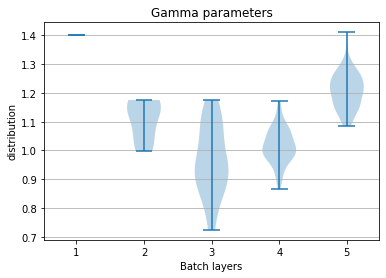

Text(0, 0.5, 'distribution')

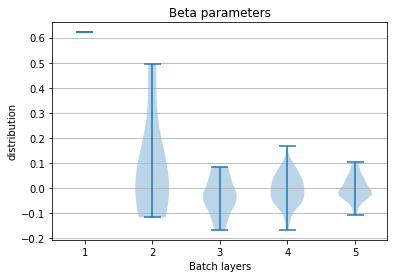

In [15]:
# outputs = [layer.output for layer in model2.layers] 
# outputs


# import numpy as np
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

fig, axes = plt.subplots()

axes.violinplot(dataset = [model2.layers[0].gamma,
                           model2.layers[2].gamma,
                           model2.layers[6].gamma,
                           model2.layers[9].gamma,
                           model2.layers[11].gamma,
                           ])

axes.set_title('Gamma parameters')
axes.yaxis.grid(True)
axes.set_xlabel('Batch layers')
axes.set_ylabel('distribution')

plt.show()
fig, axes = plt.subplots()

axes.violinplot(dataset = [model2.layers[0].beta,
                           model2.layers[2].beta,
                           model2.layers[6].beta,
                           model2.layers[9].beta,
                           model2.layers[11].beta,
                           ])

axes.set_title('Beta parameters')
axes.yaxis.grid(True)
axes.set_xlabel('Batch layers')
axes.set_ylabel('distribution')

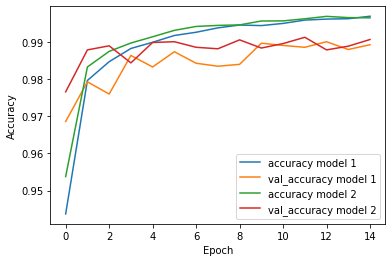

313/313 - 1s - loss: 0.0386 - accuracy: 0.9893 - 1s/epoch - 4ms/step
313/313 - 1s - loss: 0.0315 - accuracy: 0.9907 - 1s/epoch - 4ms/step


In [6]:
plt.plot(model_history1.history['accuracy'], label='accuracy model 1')
plt.plot(model_history1.history['val_accuracy'], label = 'val_accuracy model 1')
plt.plot(model_history2.history['accuracy'], label='accuracy model 2')
plt.plot(model_history2.history['val_accuracy'], label = 'val_accuracy model 2')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
test_loss, test_acc = model1.evaluate(X_test, Y_test, verbose=2)
test_loss, test_acc = model2.evaluate(X_test, Y_test, verbose=2)

### Answer: 
The batch normalization in the beginning yielded a slightly better accuracy for the second model. 


4. Train the network without batch normalization but this time use dropout. For hidden layers use dropout probability of 0.5 and for input layer take it to be 0.2 Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3.

no batch normal not normalization with dropout

In [7]:



model3 = Sequential()

model3.add(tf.keras.layers.Dropout(0.5,input_shape=X_train.shape[1:]))
model3.add(Conv2D(6, 5, activation='tanh', padding='same', input_shape=X_train.shape[1:]))
model3.add(tf.keras.layers.AveragePooling2D(2))

model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Conv2D(16, 5, activation='tanh'))
model3.add(tf.keras.layers.AveragePooling2D(2))

model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))

model3.add(Flatten())
model3.add(tf.keras.layers.Dropout(0.2))
model3.add(tf.keras.layers.Dense(84, activation='tanh'))

model3.add(tf.keras.layers.Dropout(0.2))
model3.add(Dense(10, activation='softmax'))

In [8]:
model3.build()
model3.summary()
model3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history3 = model3.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 32, 32, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 16, 16, 6)        0         
 ePooling2D)                                                     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                          

Compare test accuracy using dropout to test accuracy obtained using batch normalization in part 2 and 3.

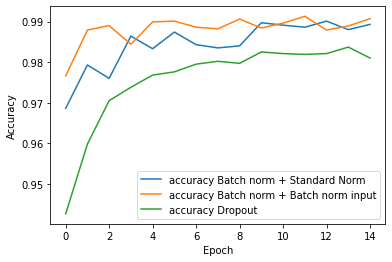

In [9]:
plt.plot(model_history1.history['val_accuracy'], label = 'accuracy Batch norm + Standard Norm')
plt.plot(model_history2.history['val_accuracy'], label = 'accuracy Batch norm + Batch norm input')
plt.plot(model_history3.history['val_accuracy'], label = 'accuracy Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### Answer:
The dropout yielded a worst perfomance then the two models with batch normalization.


5. Now train the network using both batch normalization and dropout. How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ? 

add batch any case
batch normalizaiotn and dropout. 

In [10]:
model4 = Sequential()
# model.add(norm_layer)
model4.add(tf.keras.layers.BatchNormalization(input_shape=  X_train.shape[1:]))
model4.add(tf.keras.layers.Dropout(0.5))
model4.add(Conv2D(6, 5, activation='tanh',input_shape=  X_train.shape[1:] ))

model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.AveragePooling2D(2))
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(Conv2D(16, 5, padding='valid', activation='tanh'))




model4.add(tf.keras.layers.AveragePooling2D(2))
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(tf.keras.layers.Conv2D(120, 5, activation='tanh'))

model4.add(Flatten())
model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(Dense(84, activation='tanh'))

model4.add(tf.keras.layers.BatchNormalization())
model4.add(tf.keras.layers.Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

In [17]:
model4.build()
model4.summary()
model4.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'], optimizer='adam')
model_history4 = model4.fit(X_train, Y_train,epochs= 15,batch_size=100,validation_data=(X_test, Y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_9 (Batc  (None, 32, 32, 1)        4         
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 32, 32, 1)         0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 batch_normalization_10 (Bat  (None, 28, 28, 6)        24        
 chNormalization)                                                
                                                                 
 average_pooling2d_6 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                      

How does the performance (test accuracy) of the network compare with the cases with dropout alone and with batch normalization alone ? 

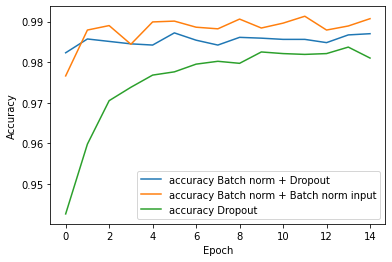

In [18]:
plt.plot(model_history4.history['val_accuracy'], label = 'accuracy Batch norm + Dropout')
plt.plot(model_history2.history['val_accuracy'], label = 'accuracy Batch norm + Batch norm input')
plt.plot(model_history3.history['val_accuracy'], label = 'accuracy Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')